## What is the true normal human body temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. In 1992, this value was revised to 36.8$^{\circ}$C or 98.2$^{\circ}$F. 

#### Exercise
In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

Answer the following questions **in this notebook below and submit to your Github account**. 

1.  Is the distribution of body temperatures normal? 
    - Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 
2.  Is the true population mean really 98.6 degrees F?
    - Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?
3.  At what temperature should we consider someone's temperature to be "abnormal"?
    - Start by computing the margin of error and confidence interval.
4.  Is there a significant difference between males and females in normal temperature?
    - Set up and solve for a two sample hypothesis testing.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [26]:
%matplotlib inline

from __future__ import print_function, division

import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt


# seed the random number generator for result conformity
np.random.seed(18)

# some nicer colors from http://colorbrewer2.org/
COLOR1 = '#7fc97f'
COLOR2 = '#beaed4'
COLOR3 = '#fdc086'
COLOR4 = '#ffff99'
COLOR5 = '#386cb0'


In [35]:
df0 = pd.read_csv('data/human_body_temperature.csv')

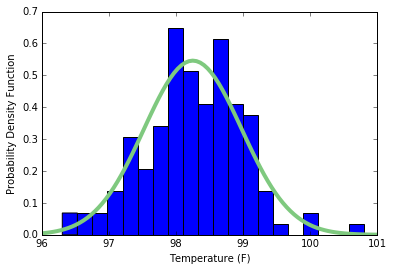

0.0598778798039 1.01543201861


In [39]:

#Q1: Is the distribution of body temperatures normal?

#Clean the data (in case there are any empty spaces)
df=df0['temperature'].replace('', np.nan)
df=df.dropna()

#Male temperatures dataset
dfm=df0['gender'].replace('', np.nan)
dfm=dfm.dropna()
dfm=df0[df0.gender == 'M']
dfm=dfm['temperature']

#Female temperatures dataset
dff=df0['gender'].replace('', np.nan)
dff=dff.dropna()
dff=df0[df0.gender == 'F']
dff=dff['temperature']

#Calculate sample mean and standard deviation

Tmean=np.mean(df)
Tstd= np.std(df)

#Generate normal distribution based on the sample meand and standard deviation
Stats= scipy.stats.norm(Tmean, Tstd)

    
#Plot the frequency distribution of body temperatures and compare it with normal distribution with the same parameters.
xs = np.linspace(96, 101, 90)
ys = Stats.pdf(xs)
plt.plot(xs, ys, linewidth=4, color=COLOR1)
plt.xlabel('Temperature (F)')
plt.ylabel('Probability Density Function')
plt.hist(df, bins = 20, normed = True)
plt.show()

TestD= np.array([(np.random.normal(loc=0.0, scale=1.0, size=None)) for i in range(1000)])

print(TestD.mean(),TestD.std())


Q1 Response: The sample data visually seems to follow the normal distribution pattern. The normalcy test function shows that the sample data can be assumed to be normally distributed at at significance level of 0.26.


In [29]:
#Q2: Is the true population mean really 98.6 degrees F?
# z-test or a t-test? How will the result be different?

#Z-test is preferred if sample size > 30. 
#Determine sample size:
len(df)


130

In [30]:
def summarize_sampling_distribution(sample_stats):
    z_stat= (PTmean-sample_stats.mean())/sample_stats.std()
    p_value = (scipy.stats.norm.sf(abs(z_stat))*2)
    t_stat = scipy.stats.ttest_1samp(sample_stats, popmean=PTmean)
    
    print('Resampled Data Z-score: ', z_stat)
    print('Resampled Data P-value: ', p_value)
    print('Resampled Data t-score: ', t_stat,'\n')
    print('Standard Error: ', sample_stats.std())
    print('90% CI: ', np.percentile(sample_stats, [5, 95]))
    


class Resampler(object):
    """Represents a framework for computing sampling distributions."""
    
    def __init__(self, sample, xlim=None):
        """Stores the actual sample."""
        self.sample = sample
        self.n = len(sample)-1
        self.xlim = xlim
        
    def resample(self):
        """Generates a new sample by choosing from the original
        sample with replacement.
        """
        new_sample = np.random.choice(self.sample, self.n, replace=True)
        return new_sample
    
    def sample_stat(self, sample):
        """Computes a sample statistic using the original sample or a
        simulated sample.
        """
        return sample.mean() 
    
    def compute_sample_statistics(self, iters=1000):
        """Simulates many experiments and collects the resulting sample
        statistics.
        """
        stats = [self.sample_stat(self.resample()) for i in range(iters)]
        return np.array(stats)
    
    def plot_sample_stats(self):
        """Runs simulated experiments and summarizes the results.
        """
        sample_stats = self.compute_sample_statistics()
        summarize_sampling_distribution(sample_stats)
        plt.hist(sample_stats, color=COLOR2)
        plt.xlabel('sample statistic')
        plt.xlim(self.xlim)

In [31]:
def plot_resampled_stats(n):
        sample = Mtemps.rvs(n)
        resampler = Resampler(sample, xlim=[98, 98.5])
        resampler.plot_sample_stats()

Resampled Data Z-score:  3.30641463085
Resampled Data P-value:  0.00094498140647
Resampled Data t-score:  Ttest_1sampResult(statistic=-104.50571914189634, pvalue=0.0) 

Standard Error:  0.0687690348542
90% CI:  [ 98.25820808  98.48685873]


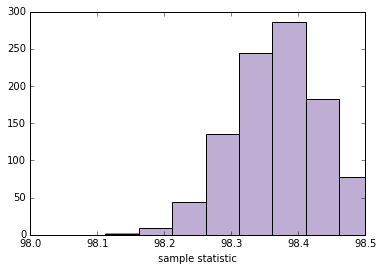

In [32]:
#Sample size is 130, therefore Z-test is suitable.
#The Hypothesis test below is a two-tailed test with the following assumptions:

#Null Hypothesis: True population mean !=sample mean
PTmean=98.6

#Alternative Hypothesis: True polulation mean = sample mean

#sample size n-1:
n=len(df)-1

#Model the population distribution based on the shape of sample data:
Mtemps = scipy.stats.norm(loc = Tmean, scale = Tstd)

#Z-Test stats output:
plot_resampled_stats(n=129)



Q2 Response: The resampled data results show that the value 98.6F would lie more than 4 standard deviations from the mean. The low P-value (less than 5%) also indicates the low probability of population body temperature mean being equal to 98.6F. 90% confidence interval shows true population mean lies between 98.11F and 98.35F. All these tests allow us to conclude that null hypothesis can berejected at 5% significance level. T-test shows similar results. 

In [33]:
#Q3: At what temperature should we consider someone's temperature to be "abnormal"?
#Start by computing the margin of error and confidence interval.

Q3 Response: Margin of errof and Confidence Interval are calculated above. 

As an example 90% confidence interval can be used to identify 'abnormal' temperature. In that case, people with body temperatures above 98.35F or below 98.13F can be considered abnormal. 


In [40]:
#Q4: Is there a significant difference between males and females in normal temperature?
# Set up and solve for a two sample hypothesis testing.

#Calculate mean and standard deviation:

#Female Statistics:
Smeanf=dff.mean()
Sstdf=dff.std()

#Male Statistics:
Smeanm=dfm.mean()
Sstdm=dfm.std()

print('Sample mean temperature-Males: ', Smeanm)
print('Sample std temperature-Males: ', Sstdm, '\n')
print('Sample mean temperature-Females: ', Smeanf)
print('Sample std temperature-Females: ', Sstdf)

Sample mean temperature-Males:  98.1046153846154
Sample std temperature-Males:  0.6987557623265908 

Sample mean temperature-Females:  98.39384615384613
Sample std temperature-Females:  0.7434877527313665


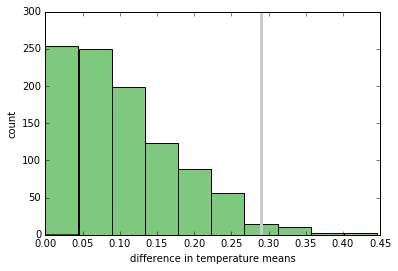

In [70]:
#Temperature samples for men and women show slightly different means and standard deviations.
#To test if these differences can be explained by randomness we need to set up a hypothesis test.
#Null hypothesis--there is no difference in body temperatures between males and females at 5% significance level.

#Create a pooled sample function:
m, f = len(dfm), len(dff)
pool =np.hstack((dfm,dff))

#Generate a test statistic for comparing differences in sample means.
def TStatistic(data):
    m, f = data
    test_stat = abs(m.mean() - f.mean())
    return test_stat

#Save the actual difference in temperatures between males and females in the actual sample for benchmarking
Adiff=abs(Smeanf-Smeanm)

#Reshuffle the pool data and create two different datasets of the same size
def RModel():
    np.random.shuffle(pool)
    data=pool[:m], pool[m:]
    return data

#Generate simulated statistics based on the randomized data pool 
tstats=np.array([TStatistic(RModel()) for i in range (1000)])


plt.vlines(Adiff, 0, 300, linewidth=3, color='0.8')
plt.hist(tstats, color=COLOR1)
plt.xlabel('difference in temperature means')
plt.ylabel('count')
None

In [68]:
#Test to see if the null hypothesis is correct:

p_val = sum(tstats >= Adiff)/len(tstats)
p_val


0.017999999999999999

Q4 Response: Based on the resulting p-value of 0.018, the difference between the male and female mean body temperatures seems significant. At 5% significance level, therefore the null hypothesis that there is no difference between male and female body temperature level can be rejected.